## SGD

In [1]:
import numpy as np
np.__version__

'1.21.6'

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [25]:
data = np.loadtxt("/content/sample_data/training.txt")
data.shape

(1000, 3)

In [4]:
data[:, :2]

array([[19.410541 , 11.45899  ],
       [23.765585 , 13.972661 ],
       [10.719978 ,  8.8566508],
       ...,
       [ 8.8913669, 12.265898 ],
       [14.197481 , 10.280842 ],
       [ 6.7481281, 10.253769 ]])

In [7]:
data[:, 2]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [26]:
SEED_NUMBER = 42

np.random.seed(SEED_NUMBER)
np.random.shuffle(data)

In [10]:
data[:, 2]

array([0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0.,
       1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0.,
       1., 1., 0., 1., 0.

In [36]:
TEST_RATIO = 0.3

test_idx = sorted(
    np.random.choice(len(data), int(len(data) * TEST_RATIO), replace = False)
)

train_idx = np.array(list(
    set([i for i in range(len(data))]) - set(test_idx)
))


len(train_idx), len(test_idx)

(700, 300)

In [37]:
set(train_idx) & set(test_idx)

set()

In [38]:
train_data = data[train_idx]
test_data = data[test_idx]

train_data.shape, test_data.shape

((700, 3), (300, 3))

In [39]:
X_train, y_train = train_data[:, :2], train_data[:, -1]
X_test, y_test = test_data[:, :2], test_data[:, -1]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((700, 2), (700,), (300, 2), (300,))

In [40]:
y_train = y_train[:, np.newaxis]
y_test = y_test[:, np.newaxis]

In [41]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((700, 2), (700, 1), (300, 2), (300, 1))

In [42]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

def binary_cross_entropy_error(y_true, y_pred):
    y_pred = np.clip(y_pred, 1e-7, 1 - 1e-7)
    term_0 = (1-y_true) * np.log(1-y_pred + 1e-7)
    term_1 = y_true * np.log(y_pred + 1e-7)
    return -np.mean(term_0 + term_1, axis=0)

In [68]:
class SGD:
  def __init__(self, learning_rate = 0.01):
    self.lr = learning_rate

  def update(self, weight, grad):
    weight -= self.lr * grad
    return weight

class Dense:
  def __init__(self, input_size : int, output_size : int, **kwargs):
    self.optimizerW = SGD(kwargs.get("learning_rate", 0.01))
    self.optimizerB = SGD(kwargs.get("learning_rate", 0.01))
    self.W = 0.1 * np.random.rand(input_size, output_size)
    self.b = np.zeros(output_size)
    self.x = None
    self.y = None
    self.dW = None
    self.db = None

  def forward(self, x):
    self.x = x
    self.y = np.dot(self.x, self.W) + self.b
    return self.y

  def backward(self, dout, learning_rate = 0.01):
    self.dW = np.dot(self.x.T, dout)
    self.db = np.sum(dout, axis = 0)
    dx = np.dot(dout, self.W.T)
    self.optimizerW.update(self.W, self.dW)
    self.optimizerB.update(self.b, self.db)

    return dx


class Sigmoid:
  def __init__(self):
    self.y = None

  def forward(self, x):
    self.y = sigmoid(x)
    return self.y

  def backward(self, dout, learning_rate = 0.01):
    return dout * (1.0 - self.y) * self.y


class SigmoidWithLoss:
  def __init__(self):
    self.error = None
    self.y = None
    self.t = None

  def forward(self, x):
    self.y = sigmoid(x)
    return self.y

  def loss(self, t):
    self.t = t
    self.error = binary_cross_entropy_error(self.t, self.y)
    return self.error

  def backward(self, dout, learning_rate = 0.01):
    batch_size = self.t.shape[0]
    dx = (self.y - self.t) / batch_size
    return dx

In [61]:
import math
from tqdm.auto import tqdm
class Network:
  
  def __init__(self):
    self.layers = list()

  def add(self, layer):
    self.layers.append(layer)

  def predict(self, x):
    for layer in self.layers:
      x = layer.forward(x)
    return x

  def loss(self, t):
    return self.layers[-1].loss(t)

  def accuracy(self, x, y_true):
    y_pred = self.predict(x)
    
    y_pred = np.array(
        [1 if elem[0] >= 0.5 else 0 for elem in y_pred]
    )
    
    y_true = np.array([int(elem[0]) for elem in y_true])
    return np.sum(y_pred == y_true) / float(x.shape[0])
  
  def forward_pass(self, x):
    self.predict(x)

  def backward_pass(self, learning_rate):
    dout = 1
    
    # reversed(self.layers)
    # self.layers[::1]
    
    for layer in reversed(self.layers) :
      dout = layer.backward(dout, learning_rate)

  def evaluate(self, x_test, t_test):
    test_acc = self.accuracy(x_test, t_test)
    test_acc = "%.4f" % test_acc
    print(f'test_acc : {test_acc}')


  def fit(
      self,
      X_train,
      t_train,
      X_test = None,
      y_test = None,
      batch_size = 10,
      epochs = 20,
      learning_rate = 0.001):
    
    train_size = X_train.shape[0]
    history = dict(
        train_acc= list(),
        train_loss = list(),
        test_acc = list(),
        test_loss = list()
        )
    
    iter_per_epoch = int(math.ceil(train_size / batch_size))

    for epoch in tqdm(range(1, epochs + 1)):
      print(f'Epoch {epoch} / {epochs}')
      loss_sum = 0
      train_sum = 0
      for _ in range(iter_per_epoch):
        batch_mask = np.random.choice(train_size, batch_size)
        X_batch = X_train[batch_mask]
        y_batch = y_train[batch_mask]

        self.forward_pass(X_batch)
        loss_sum += self.loss(y_batch)
        train_sum += self.accuracy(X_batch,y_batch)
        self.backward_pass(X_batch)

      loss_sum /= iter_per_epoch
      train_sum /= iter_per_epoch
      str_train_sum = '%.4f' % train_sum
      print(f'train_sum: {str_train_sum}')

      history["train_loss"].append(loss_sum)
      history['train_acc'].append(train_sum)

      test_acc = self.accuracy(X_test, y_test)
      history['test_acc'].append(test_acc)

      self.forward_pass(X_test)
      test_loss = self.loss(y_test)
      history["test_loss"].append(test_loss)

    return history


In [45]:
alist = [1, 2, 3, 4, 5]
print(alist)
alist[::-1]

[1, 2, 3, 4, 5]


[5, 4, 3, 2, 1]

In [46]:
blist = alist
blist

[1, 2, 3, 4, 5]

In [47]:
blist[3] = -999

In [48]:
blist = alist[:]
blist

[1, 2, 3, -999, 5]

In [49]:
blist[3] = 23425492
alist, blist

([1, 2, 3, -999, 5], [1, 2, 3, 23425492, 5])

In [70]:
network = Network()
network.add(Dense(X_train.shape[-1], 8))
network.add(Sigmoid())
network.add(Dense(8, 1))
network.add(SigmoidWithLoss())

In [71]:
batch_size = 5
epochs = 50
learning_rate = 0.01

history = network.fit(
    X_train,
    y_train,
    X_test,
    y_test,
    batch_size=batch_size,
    epochs=epochs,
    learning_rate=learning_rate,    
)

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 1 / 50
train_sum: 0.5771
Epoch 2 / 50
train_sum: 0.6300
Epoch 3 / 50
train_sum: 0.6314
Epoch 4 / 50
train_sum: 0.5986
Epoch 5 / 50
train_sum: 0.5943
Epoch 6 / 50
train_sum: 0.6714
Epoch 7 / 50
train_sum: 0.7414
Epoch 8 / 50
train_sum: 0.8186
Epoch 9 / 50
train_sum: 0.8429
Epoch 10 / 50
train_sum: 0.8857
Epoch 11 / 50
train_sum: 0.8757
Epoch 12 / 50
train_sum: 0.8829
Epoch 13 / 50
train_sum: 0.8814
Epoch 14 / 50
train_sum: 0.8800
Epoch 15 / 50
train_sum: 0.8729
Epoch 16 / 50
train_sum: 0.8771
Epoch 17 / 50
train_sum: 0.8871
Epoch 18 / 50
train_sum: 0.8914
Epoch 19 / 50
train_sum: 0.9071
Epoch 20 / 50
train_sum: 0.8829
Epoch 21 / 50
train_sum: 0.9057
Epoch 22 / 50
train_sum: 0.8857
Epoch 23 / 50
train_sum: 0.8929
Epoch 24 / 50
train_sum: 0.8957
Epoch 25 / 50
train_sum: 0.9186
Epoch 26 / 50
train_sum: 0.8814
Epoch 27 / 50
train_sum: 0.8800
Epoch 28 / 50
train_sum: 0.8929
Epoch 29 / 50
train_sum: 0.8900
Epoch 30 / 50
train_sum: 0.8814
Epoch 31 / 50
train_sum: 0.8986
Epoch 32 / 50
tra

In [50]:
import matplotlib.pyplot as plt

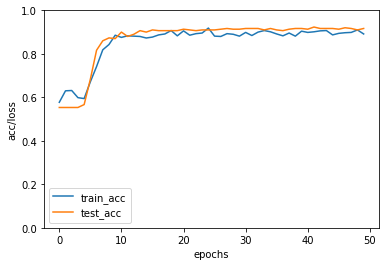

In [72]:
x = np.arange(len(history["train_acc"]))

plt.plot(x, history["train_acc"], label="train_acc")
plt.plot(x, history["test_acc"], label="test_acc")
# plt.plot(x, history["train_loss"], label="train_loss")
# plt.plot(x, history["test_loss"], label="test_loss")

plt.xlabel("epochs")
plt.ylabel("acc/loss")
plt.ylim(0, 1.0)

plt.legend(loc="lower left")

plt.show()

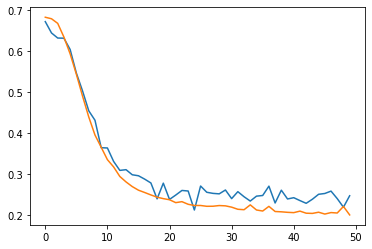

In [73]:
plt.plot(history['train_loss'])
plt.plot(history['test_loss'])

## Keras

In [93]:
import tensorflow as tf

tf.__version__

'2.9.2'

In [94]:
tf.config.list_physical_devices("GPU")

[]

In [95]:
import numpy as np

np.__version__

'1.21.6'

In [96]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train.shape, y_train.shape, X_test.shape, y_test.shape

11490434/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [97]:
help(mnist)

Help on package keras.api._v2.keras.datasets.mnist in keras.api._v2.keras.datasets:

NAME
    keras.api._v2.keras.datasets.mnist - MNIST handwritten digits dataset.

PACKAGE CONTENTS


FILE
    /usr/local/lib/python3.8/dist-packages/keras/api/_v2/keras/datasets/mnist/__init__.py




In [98]:
X_train, X_test = X_train / 255., X_test / 255.

In [99]:
sample = X_train[2580]

print("answer: ", y_train[2580])
for i in range(sample.shape[0]): # 28
    print(
        "".join(["1" if elem > 0 else "0" for elem in sample[i]])
    )

answer:  3
0000000000000000000000000000
0000000000000000000000000000
0000000000000000000000000000
0000000000000000000000000000
0000000000000000000000000000
0000000000000001111000000000
0000000000000111111000000000
0000000001111111111000000000
0000000001111111111000000000
0000000001111001111000000000
0000000000000111110000000000
0000000000001111100000000000
0000000000001111100000000000
0000000000001111000000000000
0000000000000111100000000000
0000000000000111100000000000
0000000000000011100000000000
0000000000000111100000000000
0000000000000111100000000000
0000000000001111000000000000
0000000000001111000000000000
0000000000011110000000000000
0000000001111110000000000000
0000000011111100000000000000
0000000111111000000000000000
0000000000000000000000000000
0000000000000000000000000000
0000000000000000000000000000


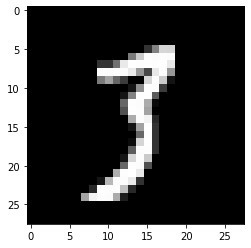

In [100]:
import matplotlib.pyplot as plt

plt.imshow(X_train[2580], cmap="gray")

plt.show()

In [101]:
X_train.shape[1:]

(28, 28)

In [102]:
100480 / 785

128.0

In [103]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

model = Sequential([
    Flatten(input_shape=X_train.shape[1:]),
    Dense(1024, activation="relu"),
    # Dropout(0.2),
    Dense(256, activation="relu"),
    Dense(16, activation="relu"),
    Dense(10, activation="softmax")
])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 1024)              803840    
                                                                 
 dense_1 (Dense)             (None, 256)               262400    
                                                                 
 dense_2 (Dense)             (None, 16)                4112      
                                                                 
 dense_3 (Dense)             (None, 10)                170       
                                                                 
Total params: 1,070,522
Trainable params: 1,070,522
Non-trainable params: 0
_________________________________________________________________


In [104]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    # loss="categorical_crossentropy",
    metrics=["accuracy"],
)

In [105]:
history = model.fit(
    X_train, y_train, 
    validation_split=0.25,
    batch_size=600,
    epochs=10
)
history

Epoch 1/10
75/75 [==============================] - 7s 85ms/step - loss: 0.5165 - accuracy: 0.8470 - val_loss: 0.2039 - val_accuracy: 0.9425
Epoch 2/10
75/75 [==============================] - 6s 80ms/step - loss: 0.1491 - accuracy: 0.9576 - val_loss: 0.1462 - val_accuracy: 0.9574
Epoch 3/10
75/75 [==============================] - 7s 92ms/step - loss: 0.0959 - accuracy: 0.9721 - val_loss: 0.1149 - val_accuracy: 0.9667
Epoch 4/10
75/75 [==============================] - 8s 108ms/step - loss: 0.0667 - accuracy: 0.9806 - val_loss: 0.1045 - val_accuracy: 0.9693
Epoch 5/10
75/75 [==============================] - 7s 100ms/step - loss: 0.0467 - accuracy: 0.9872 - val_loss: 0.0994 - val_accuracy: 0.9723
Epoch 6/10
75/75 [==============================] - 10s 139ms/step - loss: 0.0334 - accuracy: 0.9910 - val_loss: 0.0883 - val_accuracy: 0.9737
Epoch 7/10
75/75 [==============================] - 7s 93ms/step - loss: 0.0223 - accuracy: 0.9947 - val_loss: 0.0909 - val_accuracy: 0.9743
Epoch 8/1

In [106]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0759 - accuracy: 0.9785


[0.07589514553546906, 0.9785000085830688]

In [107]:
# history = model.fit(
#     X_train, y_train, 
#     validation_data=(X_test, y_test),
#     batch_size=600,
#     epochs=100
# )
# history

In [108]:
history.history

{'loss': [0.5164889097213745,
  0.14914202690124512,
  0.09590694308280945,
  0.06668926030397415,
  0.04674834385514259,
  0.033350810408592224,
  0.022291064262390137,
  0.016352592036128044,
  0.012137509882450104,
  0.007247342728078365],
 'accuracy': [0.8470222353935242,
  0.9576444625854492,
  0.9721333384513855,
  0.980555534362793,
  0.9872000217437744,
  0.9909555315971375,
  0.9946666955947876,
  0.9959333539009094,
  0.9967777729034424,
  0.9986222386360168],
 'val_loss': [0.20393942296504974,
  0.14622735977172852,
  0.11487077176570892,
  0.10449309647083282,
  0.09941326826810837,
  0.0882699266076088,
  0.0909043624997139,
  0.09609688818454742,
  0.09156640619039536,
  0.08989071100950241],
 'val_accuracy': [0.942466676235199,
  0.9574000239372253,
  0.9666666388511658,
  0.9692666530609131,
  0.972266674041748,
  0.9737333059310913,
  0.9743333458900452,
  0.9739333391189575,
  0.9760666489601135,
  0.9764000177383423]}

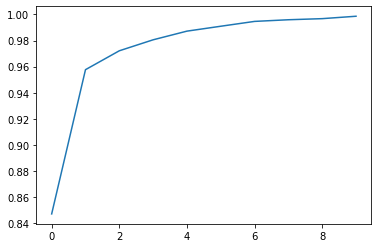

In [109]:
import matplotlib.pyplot as plt

length = len(history.history["accuracy"])
plt.plot(range(length), history.history["accuracy"])
plt.show()

## Sequential Model

In [110]:
x = tf.ones((3, 3))
x

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)>

In [74]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers

model = Sequential([
    layers.Dense(2, activation="relu", name="layer1"),
    layers.Dense(3, activation="sigmoid", name="layer2"),
    layers.Dense(4, name="layer3")
])

model

In [75]:
dir(model)

['_SCALAR_UPRANKING_ON',
 '_TF_MODULE_IGNORED_PROPERTIES',
 '__call__',
 '__class__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_activity_regularizer',
 '_add_trackable',
 '_add_trackable_child',
 '_add_variable_with_custom_getter',
 '_assert_compile_was_called',
 '_assert_weights_created',
 '_auto_track_sub_layers',
 '_autocast',
 '_autographed_call',
 '_base_model_initialized',
 '_build_graph_network_for_inferred_shape',
 '_build_input_shape',
 '_call_accepts_kwargs',
 '_call_arg_was_passed',
 '_call_fn_arg_defaults',
 '_call_fn_arg_positions',
 '_call_fn_args',
 '_call_full_argspec',
 '_callable_losses',
 '_ca

In [76]:
model.__call__

<bound method Model.__call__ of <keras.engine.sequential.Sequential object at 0x7ff75468ed60>>

In [81]:
model(x)
# 자동으로 forwarding

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[-0.4202936 , -0.54604775, -0.84012854, -0.13507698],
       [-0.4202936 , -0.54604775, -0.84012854, -0.13507698],
       [-0.4202936 , -0.54604775, -0.84012854, -0.13507698]],
      dtype=float32)>

In [80]:
x = tf.ones((3, 3))
y = model(x)
y

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[-0.4202936 , -0.54604775, -0.84012854, -0.13507698],
       [-0.4202936 , -0.54604775, -0.84012854, -0.13507698],
       [-0.4202936 , -0.54604775, -0.84012854, -0.13507698]],
      dtype=float32)>

In [83]:
model = Sequential()

model.add(layers.Dense(2, activation="relu", name="layer1"))
model.add(layers.Dense(3, activation="sigmoid", name="layer2"))
model.add(layers.Dense(4, name="layer3"))

model.pop()
model.layers

In [84]:
model = Sequential()

model.add(layers.Dense(2, activation="relu", name="layer1"))
model.add(layers.Dense(3, activation="sigmoid", name="layer2"))
model.add(layers.Dense(4, name="layer3"))

model.pop()
model.pop()
model.pop() # layer 꺼내기
model.layers

[]

In [85]:
layer1 = layers.Dense(2, activation="relu", name="layer1")
layer2 = layers.Dense(3, activation="sigmoid", name="layer2")
layer3 = layers.Dense(4, name="layer3")

x = tf.ones((3, 3))
l1_output = layer1(x)
l2_output = layer2(l1_output)
y = layer3(l2_output)
y

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[-0.81743526,  0.05542231, -0.6130753 , -1.0599182 ],
       [-0.81743526,  0.05542231, -0.6130753 , -1.0599182 ],
       [-0.81743526,  0.05542231, -0.6130753 , -1.0599182 ]],
      dtype=float32)>

In [92]:
y = layer3(tf.sum(l1_output, l2_output))

AttributeError: ignored

In [87]:
y = layer3(layer2(layer1(x)))
y

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[-0.81743526,  0.05542231, -0.6130753 , -1.0599182 ],
       [-0.81743526,  0.05542231, -0.6130753 , -1.0599182 ],
       [-0.81743526,  0.05542231, -0.6130753 , -1.0599182 ]],
      dtype=float32)>